In [1]:
# Set your student number
student_number = 99105559
Name = 'Sogand'
Last_Name = 'Salehi'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [3]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open(model_file, 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [4]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('./trained_mnist_model')

In [5]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]

In [6]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [7]:
def sample_generator():
    photos = np.zeros(shape=[5, NUM_PIXELS])
    values_z1, probabilities_z1, values_z2, probabilities_z2 = [], [], [], []
    prior_z1 = bayes_net['prior_z1']
    prior_z2 = bayes_net['prior_z2']
    
    for v, k in prior_z1.items():
        probabilities_z1.append(k)
        values_z1.append(v)
        
    for v, k in prior_z2.items():
        probabilities_z2.append(k)
        values_z2.append(v)
        
    z1_selection = np.random.choice(values_z1, 5, p = probabilities_z1)
    z2_selection = np.random.choice(values_z2, 5, p = probabilities_z2)
    
    for i in range(5):
        current_z1 = z1_selection[i]
        current_z2 = z2_selection[i]
        for j in range(NUM_PIXELS):
            p = get_p_xk_cond_z1_z2(current_z1, current_z2, j + 1)
            photos[i,j] = np.random.choice([1.,0.], p=[p, 1 - p])
            
    photos = np.reshape(photos, [-1, 28, 28])
    fig, axes = plt.subplots(1,5)
    for i, ax in enumerate(axes):
        ax.imshow(photos[i], cmap='gray')
    plt.show()

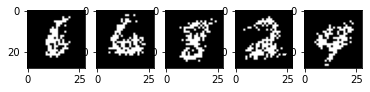

In [8]:
sample_generator()

In [9]:
def Expected():
    origin = np.arange(-3, 3.25, 0.25)
    # 3.25 because we put 3 instead it goes like [-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75]
    z1_selection = origin.copy()
    z2_selection = origin.copy()
    photos = np.zeros(shape=[len(origin), len(origin), NUM_PIXELS])
    resized = np.zeros(shape=[len(z1_selection) * 28, len(z2_selection) * 28])
    cond_likelihood = bayes_net['cond_likelihood']
    for i, current_z1 in enumerate(z1_selection):
        for j, current_z2 in enumerate(z2_selection):
            photos[i,j] = [cond_likelihood[(current_z1, current_z2)][0,k] for k in range(NUM_PIXELS)]
    photos = np.reshape(photos, [len(z1_selection), len(z2_selection), 28, 28])
    for i in range(len(z1_selection)):
        for j in range(len(z2_selection)):
            resized[i * 28 : (i + 1) * 28, j * 28 : (j + 1) * 28] = photos[i, j]
    plt.imshow(resized, cmap='gray')
    plt.show()

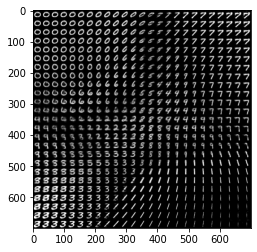

In [10]:
Expected()